In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('weather.csv')

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


in that dataset there are 8425 rows and 23 columns.

In [4]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

we see that there are high numbers of null values are present so where the null value are more than 1000 so we drop that columns.

In [5]:
df=df.drop(['Evaporation','Sunshine','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','WindGustDir','WindGustSpeed'],axis=1)

In [6]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,WNW,20.0,24.0,71.0,22.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NNW,WSW,4.0,22.0,44.0,25.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,W,WSW,19.0,26.0,38.0,30.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,SE,E,11.0,9.0,45.0,16.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,ENE,NW,7.0,20.0,82.0,33.0,17.8,29.7,No,No


In [7]:
df.shape

(8425, 15)

In [8]:
df.isnull().sum()

Date              0
Location          0
MinTemp          75
MaxTemp          60
Rainfall        240
WindDir9am      829
WindDir3pm      308
WindSpeed9am     76
WindSpeed3pm    107
Humidity9am      59
Humidity3pm     102
Temp9am          56
Temp3pm          96
RainToday       240
RainTomorrow    239
dtype: int64

In [9]:
df=df.dropna(how='all',axis=1)

In [10]:
df.shape

(8425, 15)

In [11]:
df=df.dropna(thresh=4)

In [12]:
df.shape

(8411, 15)

In [13]:
df=df.fillna(method='pad')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,WNW,20.0,24.0,71.0,22.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NNW,WSW,4.0,22.0,44.0,25.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,W,WSW,19.0,26.0,38.0,30.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,SE,E,11.0,9.0,45.0,16.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,ENE,NW,7.0,20.0,82.0,33.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,SE,ENE,13.0,11.0,51.0,24.0,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,SE,N,13.0,9.0,56.0,21.0,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,SE,WNW,9.0,9.0,53.0,24.0,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,SSE,N,13.0,7.0,51.0,24.0,15.1,26.0,No,No


In [14]:
df.isnull().sum()

Date            0
Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
WindDir9am      0
WindDir3pm      0
WindSpeed9am    0
WindSpeed3pm    0
Humidity9am     0
Humidity3pm     0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

In [15]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

we see that all the null values are removed. so we do furthr process.

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        812
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       470
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


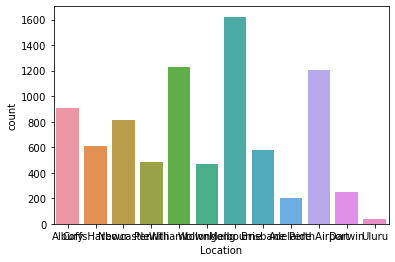

In [16]:
sns.countplot('Location', data=df)
print(df['Location'].value_counts())

mostly location are in the melbourne and williamtown city.

 12.0    75
 13.2    71
 13.8    69
 12.7    68
 14.8    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64


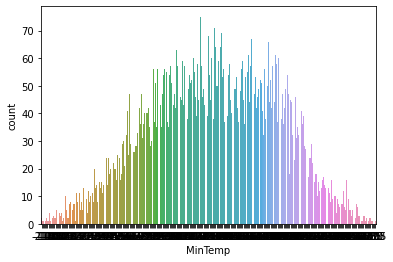

In [17]:
sns.countplot('MinTemp', data=df)
print(df['MinTemp'].value_counts())

average temp is around 12 to 13 degree

19.0    87
19.8    76
23.8    75
25.0    71
22.3    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64


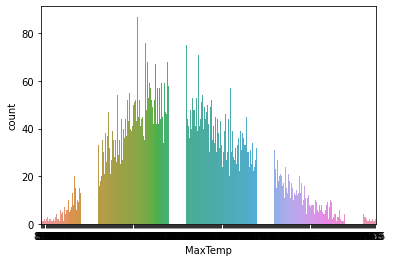

In [18]:
sns.countplot('MaxTemp', data=df)
print(df['MaxTemp'].value_counts())

max temp in 19 to 23 degree.

0.0      5450
0.2       410
0.4       177
0.6       126
1.2        90
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: Rainfall, Length: 250, dtype: int64


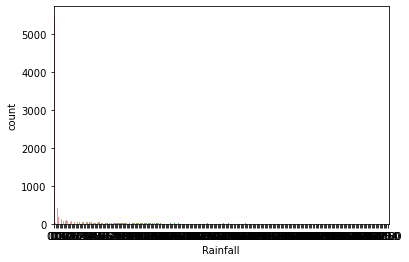

In [19]:
sns.countplot('Rainfall', data=df)
print(df['Rainfall'].value_counts())

0 raninfall is most in aus.

N      949
SW     828
NW     805
SE     568
WSW    561
NE     506
WNW    499
SSW    492
ENE    457
NNE    453
W      452
S      448
E      419
SSE    395
NNW    300
ESE    279
Name: WindDir9am, dtype: int64


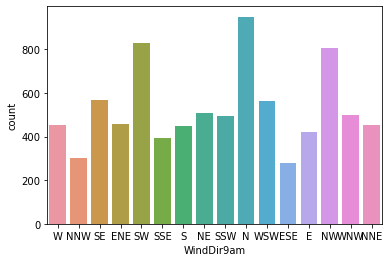

In [20]:
sns.countplot('WindDir9am', data=df)
print(df['WindDir9am'].value_counts())

SE     898
S      745
SSE    625
WSW    583
NE     579
SW     562
N      526
NW     512
WNW    493
E      470
ESE    468
W      467
ENE    422
NNE    377
SSW    375
NNW    309
Name: WindDir3pm, dtype: int64


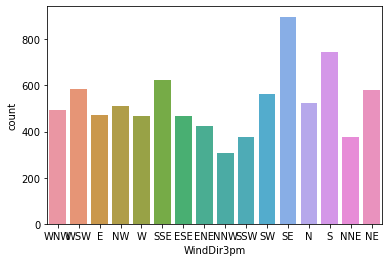

In [21]:
sns.countplot('WindDir3pm', data=df)
print(df['WindDir3pm'].value_counts())

south east wind are most.

9.0     808
0.0     775
13.0    713
4.0     616
11.0    607
7.0     574
6.0     516
17.0    483
15.0    469
19.0    435
20.0    427
24.0    320
22.0    280
2.0     259
28.0    230
26.0    208
31.0    153
30.0    114
35.0     77
33.0     70
37.0     58
41.0     49
39.0     35
44.0     29
43.0     28
46.0     26
52.0     16
50.0     10
56.0      8
54.0      6
48.0      6
61.0      2
57.0      2
63.0      2
Name: WindSpeed9am, dtype: int64


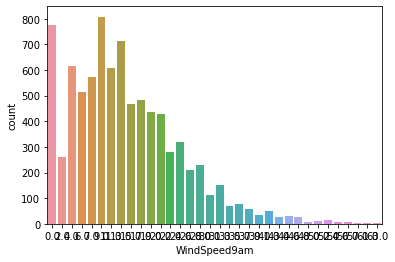

In [22]:
sns.countplot('WindSpeed9am', data=df)
print(df['WindSpeed9am'].value_counts())

9.0     727
19.0    651
13.0    602
20.0    594
17.0    556
11.0    536
15.0    526
24.0    511
28.0    462
22.0    462
26.0    381
7.0     331
4.0     297
30.0    279
31.0    266
6.0     241
0.0     206
33.0    170
35.0    137
37.0    128
39.0     80
46.0     66
2.0      58
41.0     45
43.0     34
44.0     18
50.0     12
48.0     11
52.0      9
56.0      7
54.0      2
61.0      2
57.0      2
65.0      1
83.0      1
Name: WindSpeed3pm, dtype: int64


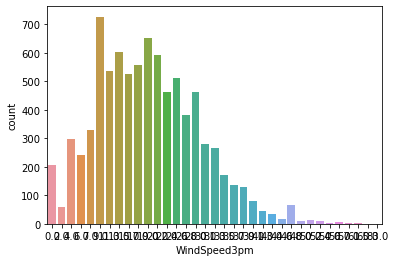

In [23]:
sns.countplot('WindSpeed3pm', data=df)
print(df['WindSpeed3pm'].value_counts())

73.0    205
62.0    203
68.0    202
74.0    196
71.0    194
       ... 
17.0      2
14.0      2
11.0      2
10.0      1
15.0      1
Name: Humidity9am, Length: 90, dtype: int64


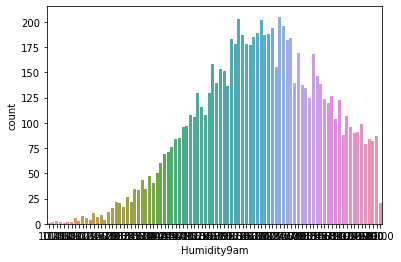

In [24]:
sns.countplot('Humidity9am', data=df)
print(df['Humidity9am'].value_counts())

humidity is around 65 to 75.

48.0    196
54.0    195
46.0    195
55.0    195
51.0    194
       ... 
8.0      11
7.0       9
98.0      7
99.0      3
6.0       3
Name: Humidity3pm, Length: 94, dtype: int64


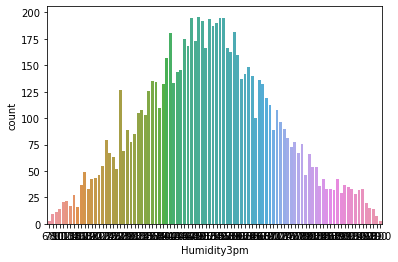

In [25]:
sns.countplot('Humidity3pm', data=df)
print(df['Humidity3pm'].value_counts())

humity around 45 to 55 

14.8    77
18.0    73
18.3    71
17.5    69
20.6    68
        ..
2.5      1
2.0      1
3.4      1
5.2      1
30.2     1
Name: Temp9am, Length: 304, dtype: int64


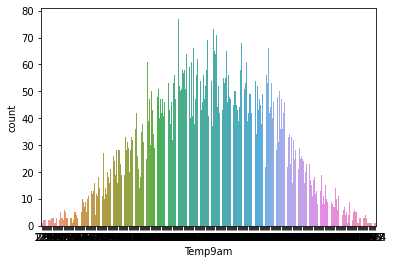

In [26]:
sns.countplot('Temp9am', data=df)
print(df['Temp9am'].value_counts())

26.0    91
19.2    80
22.5    78
19.0    77
18.5    73
        ..
37.4     1
8.7      1
36.7     1
8.6      1
42.4     1
Name: Temp3pm, Length: 328, dtype: int64


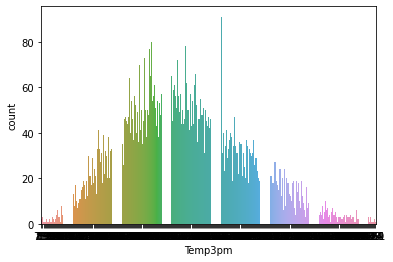

In [27]:
sns.countplot('Temp3pm', data=df)
print(df['Temp3pm'].value_counts())

No     6370
Yes    2041
Name: RainToday, dtype: int64


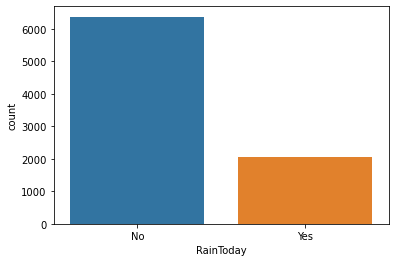

In [28]:
sns.countplot('RainToday', data=df)
print(df['RainToday'].value_counts())

rain today is no is most in aus

No     6369
Yes    2042
Name: RainTomorrow, dtype: int64


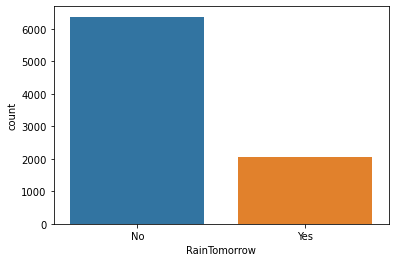

In [29]:
sns.countplot('RainTomorrow', data=df)
print(df['RainTomorrow'].value_counts())

rain tomorrow no is more than yes

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8411 entries, 0 to 8424
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          8411 non-null   object 
 1   Location      8411 non-null   object 
 2   MinTemp       8411 non-null   float64
 3   MaxTemp       8411 non-null   float64
 4   Rainfall      8411 non-null   float64
 5   WindDir9am    8411 non-null   object 
 6   WindDir3pm    8411 non-null   object 
 7   WindSpeed9am  8411 non-null   float64
 8   WindSpeed3pm  8411 non-null   float64
 9   Humidity9am   8411 non-null   float64
 10  Humidity3pm   8411 non-null   float64
 11  Temp9am       8411 non-null   float64
 12  Temp3pm       8411 non-null   float64
 13  RainToday     8411 non-null   object 
 14  RainTomorrow  8411 non-null   object 
dtypes: float64(9), object(6)
memory usage: 1.3+ MB


<AxesSubplot:xlabel='RainToday', ylabel='MinTemp'>

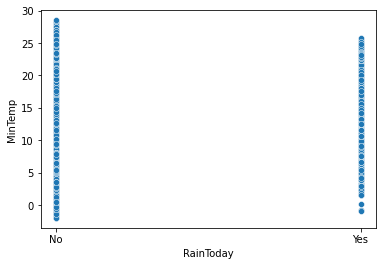

In [31]:
sns.scatterplot(x='RainToday', y= 'MinTemp', data=df)

when temp is low then percentage of rain is high.

<AxesSubplot:xlabel='RainToday', ylabel='MaxTemp'>

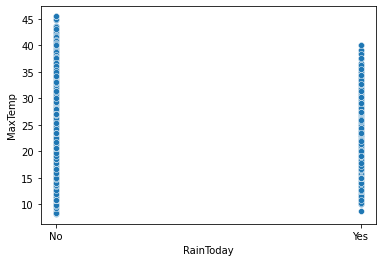

In [32]:
sns.scatterplot(x='RainToday', y= 'MaxTemp', data=df)

we see that when the temp is high that day rain percentage was low.

<AxesSubplot:xlabel='RainTomorrow', ylabel='MaxTemp'>

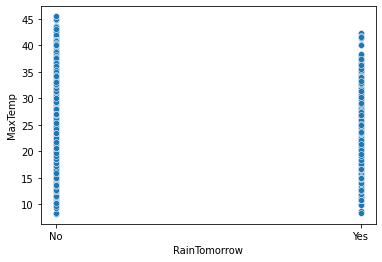

In [33]:
sns.scatterplot(x='RainTomorrow', y= 'MaxTemp', data=df)

<AxesSubplot:xlabel='RainTomorrow', ylabel='Rainfall'>

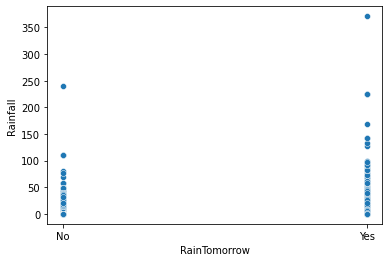

In [34]:
sns.scatterplot(x='RainTomorrow', y= 'Rainfall', data=df)

<AxesSubplot:xlabel='RainTomorrow', ylabel='WindSpeed9am'>

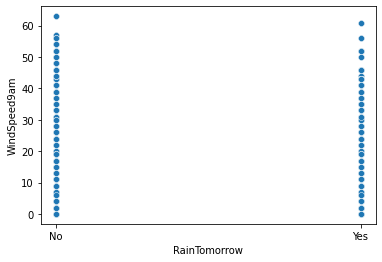

In [35]:
sns.scatterplot(x='RainTomorrow', y= 'WindSpeed9am', data=df)

<AxesSubplot:xlabel='RainTomorrow', ylabel='WindSpeed3pm'>

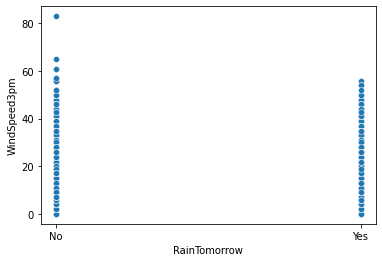

In [36]:
sns.scatterplot(x='RainTomorrow', y= 'WindSpeed3pm', data=df)

our visualization part is complete so we go to the numaric part.

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
df1=df.select_dtypes(object)

In [39]:
df1

,Date,Location,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,WNW,No,No
1,2008-12-02,Albury,NNW,WSW,No,No
2,2008-12-03,Albury,W,WSW,No,No
3,2008-12-04,Albury,SE,E,No,No
4,2008-12-05,Albury,ENE,NW,No,No
...,...,...,...,...,...,...
8420,2017-06-21,Uluru,SE,ENE,No,No
8421,2017-06-22,Uluru,SE,N,No,No
8422,2017-06-23,Uluru,SE,WNW,No,No
8423,2017-06-24,Uluru,SSE,N,No,No


In [40]:
for i in df1:
    le=LabelEncoder()
    df1[i]=le.fit_transform(df1[i])

In [41]:
df1

,Date,Location,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,0,1,13,14,0,0
1,1,1,6,15,0,0
2,2,1,13,15,0,0
3,3,1,9,0,0,0
4,4,1,1,7,0,0
...,...,...,...,...,...,...
8420,2999,9,9,1,0,0
8421,3000,9,9,3,0,0
8422,3001,9,9,14,0,0
8423,3002,9,10,3,0,0


In [42]:
df2=df.select_dtypes(float)

In [43]:
df2

,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,20.0,24.0,71.0,22.0,16.9,21.8
1,7.4,25.1,0.0,4.0,22.0,44.0,25.0,17.2,24.3
2,12.9,25.7,0.0,19.0,26.0,38.0,30.0,21.0,23.2
3,9.2,28.0,0.0,11.0,9.0,45.0,16.0,18.1,26.5
4,17.5,32.3,1.0,7.0,20.0,82.0,33.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...
8420,2.8,23.4,0.0,13.0,11.0,51.0,24.0,10.1,22.4
8421,3.6,25.3,0.0,13.0,9.0,56.0,21.0,10.9,24.5
8422,5.4,26.9,0.0,9.0,9.0,53.0,24.0,12.5,26.1
8423,7.8,27.0,0.0,13.0,7.0,51.0,24.0,15.1,26.0


In [44]:
df=pd.concat([df1 , df2], axis=1)

In [45]:
df

,Date,Location,WindDir9am,WindDir3pm,RainToday,RainTomorrow,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm
0,0,1,13,14,0,0,13.4,22.9,0.6,20.0,24.0,71.0,22.0,16.9,21.8
1,1,1,6,15,0,0,7.4,25.1,0.0,4.0,22.0,44.0,25.0,17.2,24.3
2,2,1,13,15,0,0,12.9,25.7,0.0,19.0,26.0,38.0,30.0,21.0,23.2
3,3,1,9,0,0,0,9.2,28.0,0.0,11.0,9.0,45.0,16.0,18.1,26.5
4,4,1,1,7,0,0,17.5,32.3,1.0,7.0,20.0,82.0,33.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2999,9,9,1,0,0,2.8,23.4,0.0,13.0,11.0,51.0,24.0,10.1,22.4
8421,3000,9,9,3,0,0,3.6,25.3,0.0,13.0,9.0,56.0,21.0,10.9,24.5
8422,3001,9,9,14,0,0,5.4,26.9,0.0,9.0,9.0,53.0,24.0,12.5,26.1
8423,3002,9,10,3,0,0,7.8,27.0,0.0,13.0,7.0,51.0,24.0,15.1,26.0


our all the data are in numaric form so we further do the process.

# Describe

In [46]:
df.describe()

,Date,Location,WindDir9am,WindDir3pm,RainToday,RainTomorrow,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm
count,8411.000000,8411.000000,8411.000000,8411.000000,8411.000000,8411.000000,8411.000000,8411.000000,8411.000000,8411.000000,8411.000000,8411.000000,8411.000000,8411.000000,8411.000000
mean,1296.305909,5.790869,7.710974,7.781952,0.242658,0.242777,13.191154,23.864903,2.782689,13.811794,18.628582,67.854714,51.180478,17.763595,22.457056
std,854.088335,3.163239,4.535897,4.476336,0.428716,0.428787,5.403193,6.134185,10.368921,10.175903,9.922528,16.833035,18.455319,5.627250,5.965063
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,10.000000,6.000000,1.900000,7.300000
25%,589.500000,3.000000,3.000000,4.000000,0.000000,0.000000,9.200000,19.300000,0.000000,6.000000,11.000000,56.000000,38.000000,13.800000,18.100000
50%,1087.000000,6.000000,8.000000,8.000000,0.000000,0.000000,13.300000,23.300000,0.000000,13.000000,19.000000,68.000000,51.000000,17.800000,21.900000
75%,2021.000000,8.000000,12.000000,12.000000,0.000000,0.000000,17.400000,28.050000,1.000000,20.000000,26.000000,80.000000,63.000000,22.000000,26.400000
max,3003.000000,11.000000,15.000000,15.000000,1.000000,1.000000,28.500000,45.500000,371.000000,63.000000,83.000000,100.000000,99.000000,39.400000,44.100000


# Correlation

In [47]:
df.corr()

,Date,Location,WindDir9am,WindDir3pm,RainToday,RainTomorrow,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm
Date,1.000000,0.476950,0.031964,-0.004219,-0.011850,-0.011735,0.017006,0.102442,0.003496,-0.085221,-0.030979,0.088871,-0.043578,0.070486,0.116794
Location,0.476950,1.000000,-0.039235,-0.030017,0.003581,0.003335,0.116128,0.063654,0.006709,0.222143,0.228804,0.005720,0.055602,0.117231,0.060372
WindDir9am,0.031964,-0.039235,1.000000,0.257844,0.161176,0.037611,-0.083790,-0.246121,0.093433,-0.062921,-0.031621,0.101285,0.159201,-0.151750,-0.252001
WindDir3pm,-0.004219,-0.030017,0.257844,1.000000,0.098209,0.011167,-0.152768,-0.183767,0.035911,0.028202,0.088849,-0.014110,-0.022959,-0.169020,-0.191743
RainToday,-0.011850,0.003581,0.161176,0.098209,1.000000,0.337965,0.062586,-0.228969,0.463744,0.039852,0.021385,0.377393,0.360496,-0.102799,-0.239045
RainTomorrow,-0.011735,0.003335,0.037611,0.011167,0.337965,1.000000,0.093129,-0.160174,0.227006,0.070454,0.052721,0.282244,0.450228,-0.029147,-0.200990
MinTemp,0.017006,0.116128,-0.083790,-0.152768,0.062586,0.093129,1.000000,0.720770,0.086502,0.137161,0.164213,-0.131177,0.085532,0.888468,0.684487
MaxTemp,0.102442,0.063654,-0.246121,-0.183767,-0.228969,-0.160174,0.720770,1.000000,-0.088484,0.012755,0.079756,-0.390401,-0.414011,0.868369,0.973633
Rainfall,0.003496,0.006709,0.093433,0.035911,0.463744,0.227006,0.086502,-0.088484,1.000000,0.050486,0.022327,0.230111,0.237356,-0.008105,-0.091935
WindSpeed9am,-0.085221,0.222143,-0.062921,0.028202,0.039852,0.070454,0.137161,0.012755,0.050486,1.000000,0.543170,-0.359021,-0.108907,0.109652,-0.004254


In [48]:
df.corr()['RainTomorrow'].sort_values()

Temp3pm        -0.200990
MaxTemp        -0.160174
Temp9am        -0.029147
Date           -0.011735
Location        0.003335
WindDir3pm      0.011167
WindDir9am      0.037611
WindSpeed3pm    0.052721
WindSpeed9am    0.070454
MinTemp         0.093129
Rainfall        0.227006
Humidity9am     0.282244
RainToday       0.337965
Humidity3pm     0.450228
RainTomorrow    1.000000
Name: RainTomorrow, dtype: float64

correlation using heatmap

<AxesSubplot:>

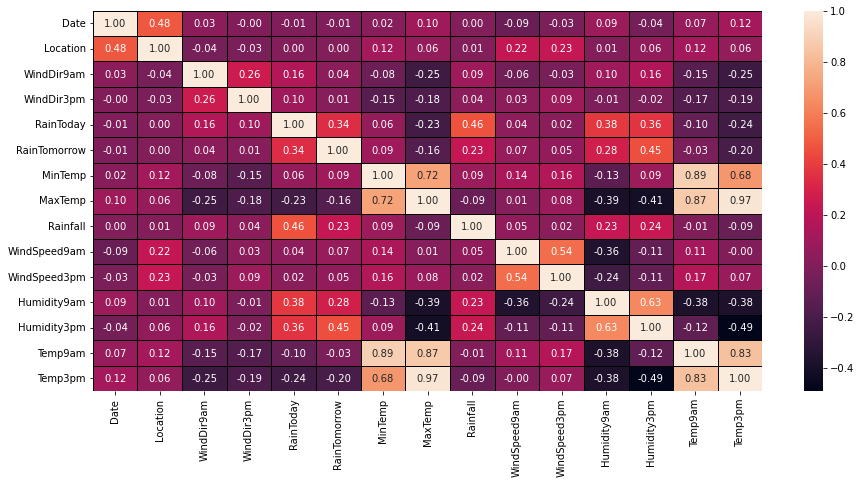

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True , linewidth=0.5 , linecolor='black', fmt='.2f')

we see that the maxtemp and temp3pm both columns have very good correlation so we drop one column.

In [50]:
df=df.drop('Temp3pm',axis=1)

In [51]:
df=df.drop('Temp9am',axis=1)

In [52]:
df.corr()['RainTomorrow'].sort_values()

MaxTemp        -0.160174
Date           -0.011735
Location        0.003335
WindDir3pm      0.011167
WindDir9am      0.037611
WindSpeed3pm    0.052721
WindSpeed9am    0.070454
MinTemp         0.093129
Rainfall        0.227006
Humidity9am     0.282244
RainToday       0.337965
Humidity3pm     0.450228
RainTomorrow    1.000000
Name: RainTomorrow, dtype: float64

correlation under 0.05 are we drop.

In [53]:
df=df.drop(['Location','WindDir3pm','WindDir9am'],axis=1)

# skewness

In [54]:
df.skew()

Date             0.389103
RainToday        1.200809
RainTomorrow     1.200054
MinTemp         -0.091934
MaxTemp          0.376774
Rainfall        13.051172
WindSpeed9am     0.952892
WindSpeed3pm     0.520779
Humidity9am     -0.256309
Humidity3pm      0.121742
dtype: float64

+-0.85 between of skewness is good skewness.

normal distribution curve

<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

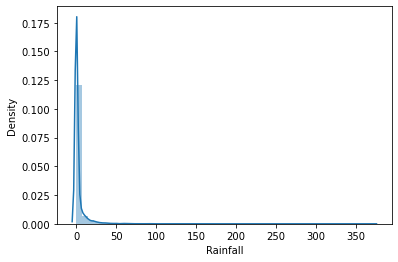

In [55]:
sns.distplot(df['Rainfall'])

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Density'>

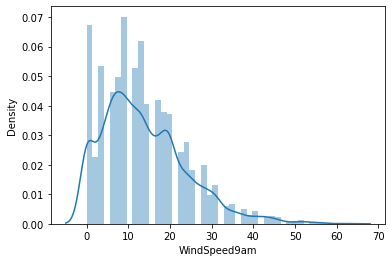

In [56]:
sns.distplot(df['WindSpeed9am'])

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Density'>

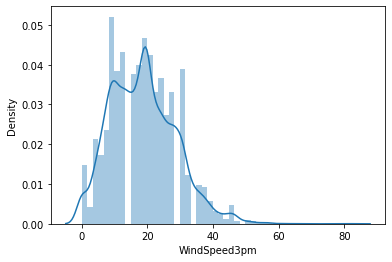

In [57]:
sns.distplot(df['WindSpeed3pm'])

we see the outliers in dataset

Date               AxesSubplot(0.125,0.536818;0.133621x0.343182)
RainToday       AxesSubplot(0.285345,0.536818;0.133621x0.343182)
RainTomorrow     AxesSubplot(0.44569,0.536818;0.133621x0.343182)
MinTemp         AxesSubplot(0.606034,0.536818;0.133621x0.343182)
MaxTemp         AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Rainfall              AxesSubplot(0.125,0.125;0.133621x0.343182)
WindSpeed9am       AxesSubplot(0.285345,0.125;0.133621x0.343182)
WindSpeed3pm        AxesSubplot(0.44569,0.125;0.133621x0.343182)
Humidity9am        AxesSubplot(0.606034,0.125;0.133621x0.343182)
Humidity3pm        AxesSubplot(0.766379,0.125;0.133621x0.343182)
dtype: object

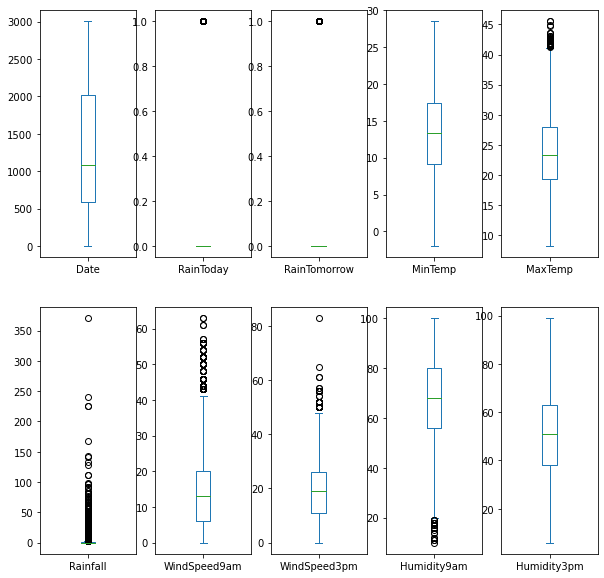

In [58]:
df.plot(kind='box',subplots=True,layout=(2,5),figsize=(10,10))

we see the outliers are present.

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

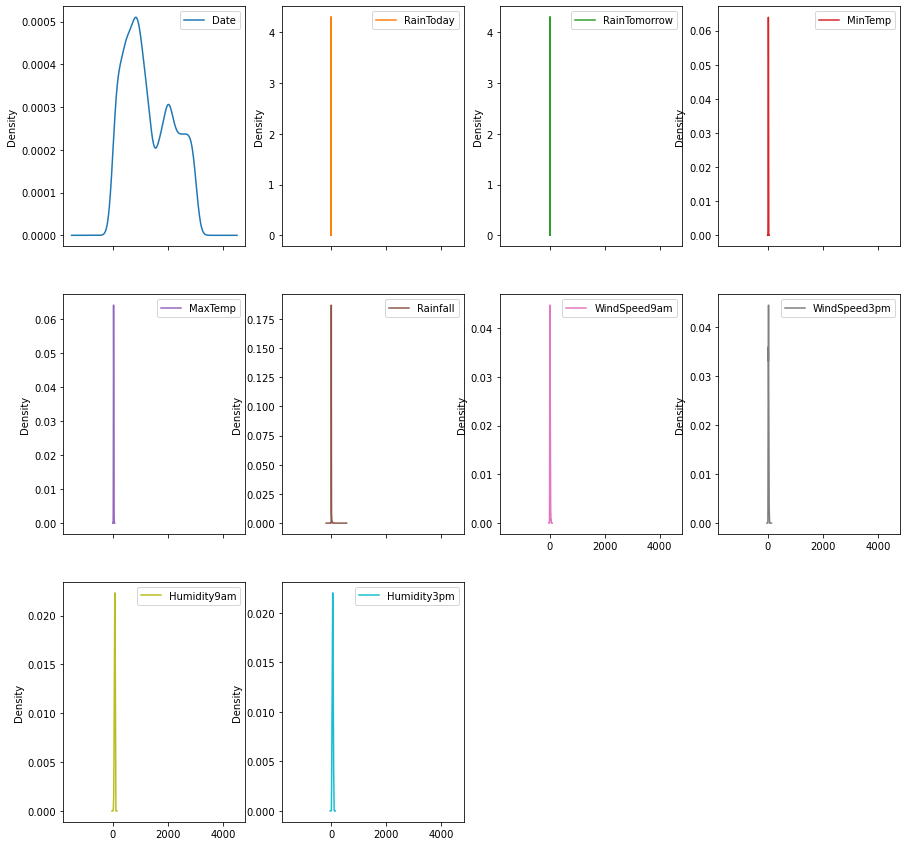

In [59]:
df.plot(kind='kde',subplots=True,layout=(3,4),figsize=(15,15))

# removing the outliers.

In [60]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  44,   60,   61,   62,   68,  381,  407,  431,  462,  699,  713,
         770,  796,  797,  802,  928,  929,  935,  949,  979,  980,  980,
        1008, 1009, 1011, 1138, 1148, 1149, 1151, 1189, 1202, 1203, 1237,
        1241, 1264, 1265, 1357, 1411, 1412, 1413, 1479, 1480, 1481, 1513,
        1535, 1587, 1644, 1661, 1665, 1673, 1680, 1774, 1814, 1868, 1893,
        1898, 1940, 2011, 2023, 2038, 2069, 2103, 2111, 2177, 2191, 2209,
        2209, 2220, 2221, 2255, 2419, 2478, 2517, 2531, 2583, 2666, 2667,
        2725, 2839, 2880, 2888, 2890, 2891, 2899, 2993, 3041, 3057, 3057,
        3058, 3072, 3072, 3079, 3089, 3131, 3162, 3202, 3238, 3268, 3281,
        3292, 3340, 3409, 3411, 3420, 3437, 3446, 3545, 3559, 3595, 3609,
        3689, 3730, 3738, 3740, 3741, 3749, 3843, 3891, 3907, 3907, 3908,
        3922, 3922, 3929, 3939, 3981, 4012, 4052, 4088, 4118, 4131, 4142,
        4190, 4259, 4261, 4270, 4287, 4296, 4395, 4409, 4445, 4459, 4521,
        4554, 4604, 4624, 4636, 4643, 

In [61]:
df_new=df[(z<3).all(axis=1)]
df_new

,Date,RainToday,RainTomorrow,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm
0,0,0,0,13.4,22.9,0.6,20.0,24.0,71.0,22.0
1,1,0,0,7.4,25.1,0.0,4.0,22.0,44.0,25.0
2,2,0,0,12.9,25.7,0.0,19.0,26.0,38.0,30.0
3,3,0,0,9.2,28.0,0.0,11.0,9.0,45.0,16.0
4,4,0,0,17.5,32.3,1.0,7.0,20.0,82.0,33.0
...,...,...,...,...,...,...,...,...,...,...
8420,2999,0,0,2.8,23.4,0.0,13.0,11.0,51.0,24.0
8421,3000,0,0,3.6,25.3,0.0,13.0,9.0,56.0,21.0
8422,3001,0,0,5.4,26.9,0.0,9.0,9.0,53.0,24.0
8423,3002,0,0,7.8,27.0,0.0,13.0,7.0,51.0,24.0


In [62]:
x=df.drop("RainTomorrow", axis=1)
y=df["RainTomorrow"]

output of this dataset is RainTomorrow and this is binary form so we used logistic regression.

In [63]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [64]:
x

array([[-2.47196773, -0.56604608,  0.04175509, ...,  0.5986848 ,
         0.15177248, -1.63320652],
       [-2.4431141 , -0.56604608, -1.07101881, ...,  0.41597784,
        -1.39428021, -1.44993333],
       [-2.42077655, -0.56604608, -0.05065672, ...,  0.77638667,
        -1.70528637, -1.15225193],
       ...,
       [ 1.65356372, -0.56604608, -1.44432639, ..., -0.95363895,
        -0.90379536, -1.51060023],
       [ 1.65428508, -0.56604608, -0.99653026, ..., -1.21057701,
        -1.01512361, -1.51060023],
       [ 1.65500633, -0.56604608,  0.31870576, ..., -0.06694831,
        -0.38756788, -0.80567182]])

In [65]:
y

0       0
1       0
2       0
3       0
4       0
       ..
8420    0
8421    0
8422    0
8423    0
8424    0
Name: RainTomorrow, Length: 8411, dtype: int32

In [66]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-2.47196773, -0.56604608,  0.04175509, ...,  0.5986848 ,
         0.15177248, -1.63320652],
       [-2.4431141 , -0.56604608, -1.07101881, ...,  0.41597784,
        -1.39428021, -1.44993333],
       [-2.42077655, -0.56604608, -0.05065672, ...,  0.77638667,
        -1.70528637, -1.15225193],
       ...,
       [ 1.65356372, -0.56604608, -1.44432639, ..., -0.95363895,
        -0.90379536, -1.51060023],
       [ 1.65428508, -0.56604608, -0.99653026, ..., -1.21057701,
        -1.01512361, -1.51060023],
       [ 1.65500633, -0.56604608,  0.31870576, ..., -0.06694831,
        -0.38756788, -0.80567182]])

# model building

# Binary classification model

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [68]:
maxAccu=0
maxRS=0

for i in range(1,30):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train, y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test, predrf)
    print('accuracy',acc,'random state',i)

if acc>maxAccu:
    maxAccu=acc
    maxRS=i

accuracy 0.82174688057041 random state 1
accuracy 0.8205585264408793 random state 2
accuracy 0.8057040998217468 random state 3
accuracy 0.8259061200237671 random state 4
accuracy 0.8354129530600118 random state 5
accuracy 0.8193701723113488 random state 6
accuracy 0.8116458704693998 random state 7
accuracy 0.8110516934046346 random state 8
accuracy 0.82174688057041 random state 9
accuracy 0.8253119429590018 random state 10
accuracy 0.8211527035056447 random state 11
accuracy 0.8122400475341652 random state 12
accuracy 0.8169934640522876 random state 13
accuracy 0.8175876411170528 random state 14
accuracy 0.8371954842543078 random state 15
accuracy 0.8169934640522876 random state 16
accuracy 0.8223410576351753 random state 17
accuracy 0.8253119429590018 random state 18
accuracy 0.8074866310160428 random state 19
accuracy 0.8181818181818182 random state 20
accuracy 0.8270944741532977 random state 21
accuracy 0.8270944741532977 random state 22
accuracy 0.8205585264408793 random state 23
a

creating the train test splite method

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=15)

In [70]:
x_train

array([[ 1.43542792, -0.56604608, -0.38376997, ...,  0.41597784,
         0.27454914, -0.13958657],
       [-0.18135168, -0.56604608, -0.88489276, ...,  1.68290647,
         0.7756602 , -0.13958657],
       [ 0.53956545, -0.56604608, -0.6433727 , ..., -2.42698973,
        -0.50436455, -0.97765011],
       ...,
       [ 0.75863541,  1.76664063, -0.42082695, ...,  1.20179454,
         0.21303226, -0.46863402],
       [ 1.32009904, -0.56604608,  0.63210688, ...,  0.41597784,
         0.15177248,  0.6030286 ],
       [ 0.32343841, -0.56604608,  0.55840836, ...,  0.94957731,
        -0.79119917,  0.39404159]])

In [71]:
y_train

3991    1
5196    0
1606    0
8395    0
3406    0
       ..
6542    0
2703    0
8090    0
3841    0
7638    0
Name: RainTomorrow, Length: 6728, dtype: int32

In [72]:
x_test.shape

(1683, 9)

In [73]:
y_test.shape

(1683,)

# Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train, y_train)
predlr=LR.predict(x_test)
print('accuracy', accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

accuracy 83.71954842543077
[[1220   75]
 [ 199  189]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1295
           1       0.72      0.49      0.58       388

    accuracy                           0.84      1683
   macro avg       0.79      0.71      0.74      1683
weighted avg       0.83      0.84      0.83      1683



the accuracy is 83.71 %.

we see other method also.

# Decision Tree Classifier

In [75]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print('accuracy', accuracy_score(y_test, preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

accuracy 82.94711824123588
[[1139  156]
 [ 131  257]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1295
           1       0.62      0.66      0.64       388

    accuracy                           0.83      1683
   macro avg       0.76      0.77      0.76      1683
weighted avg       0.83      0.83      0.83      1683



the accuracy of the dt is 82.94 % and it is the good accuracy score.

# Random Forest Classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('accuracy', accuracy_score(y_test, predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

accuracy 90.13666072489602
[[1258   37]
 [ 129  259]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1295
           1       0.88      0.67      0.76       388

    accuracy                           0.90      1683
   macro avg       0.89      0.82      0.85      1683
weighted avg       0.90      0.90      0.90      1683



we see that the random forest classifier have the 89.78% accuracy.

# support vector classifier

In [77]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)
ad_pred=svc.predict(x_test)
print('accuracy', accuracy_score(y_test, ad_pred)*100)
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

accuracy 84.25430778371955
[[1245   50]
 [ 215  173]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1295
           1       0.78      0.45      0.57       388

    accuracy                           0.84      1683
   macro avg       0.81      0.70      0.74      1683
weighted avg       0.83      0.84      0.83      1683



support vector classifier have the 84 % accuracy.

we see the accuracy of all methods but we see the data are overlap.

# Cross Validation

In [78]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR,x,y,cv=5)
print('cross validation score of logistic regression is', scr.mean())

cross validation score of logistic regression is 0.8089367480498486


In [79]:
scr2=cross_val_score(rf,x,y,cv=5)
print('cross validation score of random forest classifiers is', scr2.mean())

cross validation score of random forest classifiers is 0.8480572670822373


In [80]:
scr3=cross_val_score(svc,x,y,cv=5)
print('cross validation score of svc is', scr3.mean())

cross validation score of svc is 0.821303897193944


In [81]:
scr4=cross_val_score(dt,x,y,cv=5)
print('cross validation score of decision tree classifers is', scr4.mean())

cross validation score of decision tree classifers is 0.7824327770959931


we see that random forest have best accuracy score.

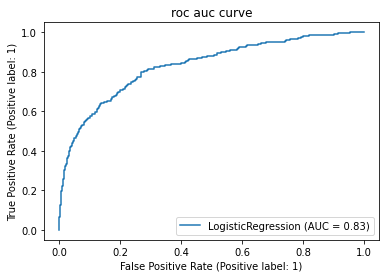

In [82]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(LR,x_test,y_test)
plt.title('roc auc curve')
plt.show()

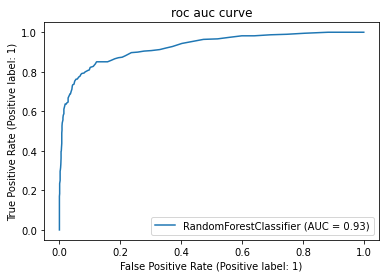

In [83]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf,x_test,y_test)
plt.title('roc auc curve')
plt.show()

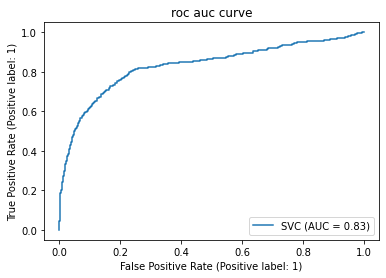

In [84]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svc,x_test,y_test)
plt.title('roc auc curve')
plt.show()

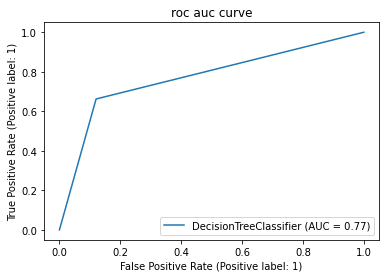

In [85]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dt,x_test,y_test)
plt.title('roc auc curve')
plt.show()

random forest have the best accuracy score so we save that model.

In [86]:
import pickle
filename='weather prediction.pkl'
pickle.dump(rf, open(filename, 'wb'))

# Conclusion

In [87]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
df_com=pd.DataFrame({'original':a, 'predicted':predicted}, index=range(len(a)))
df_com

,original,predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
1678,0,0
1679,0,0
1680,1,1
1681,0,0
